# Polynomial Regression

$\hat{y} = a_1 + a_2*x + a_3*x^2 + \dots$

Define squared error:

$f(x) = \sum^{n}_{i=0}(\hat{y}_i - y_i)^2$ in order to minimize this (optimizing weights), take derivatives with respect to each weight (coefficient).

$\dfrac{\partial f(x)}{\partial a_0} = \sum^{n}_{i=0}(f(x_i) - y_i)$

$\dfrac{\partial f(x)}{\partial a_1} = \sum^{n}_{i=0}x(f(x_i) - y_i)$

$\dfrac{\partial f(x)}{\partial a_2} = \sum^{n}_{i=0}x^2(f(x_i) - y_i)$

$\dots$

These derivatives must be taken n times, with n being the number of terms in the equation. Then, plug $f(x)$ and simplify. For example, the final matrix form of a polynomial fit with 2 terms would be:


$\begin{bmatrix} n & \sum^{n}_{i=0}x \\ \sum^{n}_{i=0}x & \sum^{n}_{i=0}x^2\end{bmatrix}$ $\begin{bmatrix} a_0 \\ a_1\end{bmatrix}$ = $\begin{bmatrix} \sum^{n}_{i=0}y \\ \sum^{n}_{i=0}yx\end{bmatrix}$

for simplicity, denote these with:

$XW = Y$

then to find $W$:

$X^{-1}XW = X^{-1}Y$

which will result in

$W = X^{-1}Y$

so **we will calculate $W$ and use for polynomial regression task.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
order = 3 # total number of terms

In [3]:
# data generation
x = np.linspace(0,1.5*np.pi,100)
y = np.sin(x)*5 + np.random.randn(100)

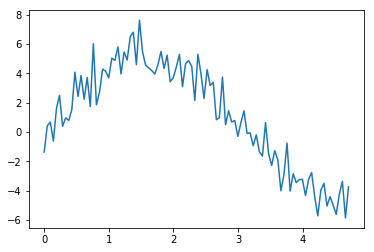

In [4]:
# first look
plt.plot(x,y)

In [5]:
# initialize matrices with zero, will be filled in following step
XM = np.zeros((order,order))
YM = np.zeros((order,1))

# construct the required matrices
for i in range(order):
    YM[i,0] = np.sum(y*x**(i))
    for j in range(order):
        XM[i,j] = np.sum(x**(i+j))
        
W = np.dot(np.linalg.inv(XM),YM) # calculate weights by matrix multiplication denoted above

In [6]:
def f(x,w):
    pows = np.arange(order)
    features = np.asarray([np.power(m,pows) for m in x])
    return np.dot(features,w).ravel()

In [7]:
# predict
y_bar = f(x,W)

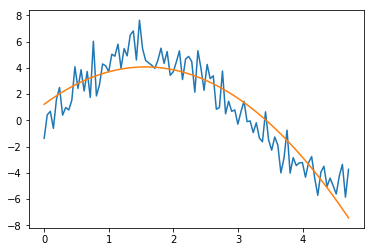

In [8]:
plt.plot(x,y)
plt.plot(x,y_bar)
plt.show()